In [41]:
import random

def coin():
    heads=0
    for i in range(1000):
        if random.random()<=0.5:
            heads+=1
    return heads
coin()


def sim(n):
    lst=[]
    for i in range(n):
        lst.append(coin())
    return sum(lst)/n
sim(2)

505.0

In [52]:
def sim(n):
    lst=[]
    for i in range(n):
        heads=0
        for i in range(1000):
            if random.random()<=0.5:
                heads+=1
        lst.append(heads)
    return lst
lst = sim(100000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1150750f0>]],
      dtype=object)

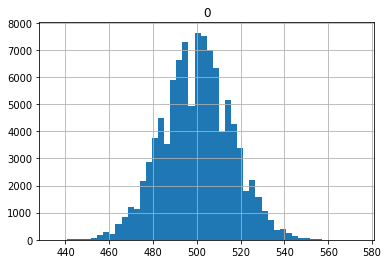

In [58]:
import pandas as pd
df = pd.DataFrame(lst)
df.hist(bins=50)

In [70]:
cards =52
aces=4

ace_proba=1
while aces >0:
    ace_proba= ace_proba*aces/cards
    aces=aces-1
    cards=cards-1

ace_proba=ace_proba*100


print(str(round(ace_proba,400))+'%')

0.0003693785206390249%


In [76]:
def event_proba(desired_event, possible_event):
    proba=desired_event/possible_event*100
    return round(proba,2)

hearts=13
event_proba(hearts,52)

face=12
event_proba(face,52)

queen_of_spades=1
event_proba(queen_of_spades,52)



1.92

# Permutations

- example of game: hangman -> 26 letters 
- 5 letters in word 
- without repetition 
- the order is importan
- A nm = n!/(n-m)!

# replacements = reordering

- Pn = n!
- without replacement
Cnm =  n!/(m!*(n-m)!)
- with replacement 
Cnk= (n+k-1)!/(n-1)!k!

In [82]:
import math
n=52
k=2
Permutations= math.factorial(n)/math.factorial(n-k)
Replacements=  math.factorial(k)
Combinations = Permutations/Replacements

print(Permutations,Replacements, Combinations)

2652.0 2 1326.0


In [86]:
cards=52
cards_drawn=1
cards=cards-cards_drawn

aces=4
ace_proba=event_proba(aces,cards)

aces_drawn=1
aces=aces-aces_drawn
ace_proba1= event_proba(aces, cards)

print(ace_proba,ace_proba1)

7.84 5.88


In [88]:
#sample space
cards=52
hands=2
turn_table=4
cards=cards-(hands+turn_table)

diamonds= 13
diamonds_open=4

outs= diamonds-diamonds_open
river_flush_proba=event_proba(outs,cards)

print(river_flush_proba)

19.57


In [ ]:
king=4
eight=4

out=eight+king

river_straight_proba=event_proba(outs,cards)
print(river_straight_proba)

# Mutual exclusive events 

In [91]:
hearts=13
spades=13

heart_or_spades=event_proba(hearts,cards)+event_proba(spades,cards)


aces=4
kings=4
queens=4

ace_king_queen = event_proba(aces,cards)+event_proba(kings, cards)+event_proba(aces,kings)

ace_king_queen

117.4

In [94]:
# Drawing a face card or red card

cards=52
red_cards=26
face_cards=12
red_face=6


red_or_face=event_proba(red_cards, cards)+event_proba(face_cards, cards)+event_proba(red_cards, face_cards)
print(red_or_face)

289.75


In [96]:
import numpy as np
import pandas as pd
import scipy.stats as st

s=np.random.normal(1,2,10000)
s

array([-1.06266981,  4.2844088 ,  1.22887518, ...,  1.58750181,
       -1.62603347, -0.40855704])

In [98]:
p=np.random.normal(3,2,10000)
p

array([ 4.11717892, -1.51314248,  0.02750061, ...,  7.05426823,
        8.28469812,  2.79369902])

In [101]:
df=pd.DataFrame([s,p]).T
df.columns=['s','p']
df.head()

,s,p
0,-1.062670,4.117179
1,4.284409,-1.513142
2,1.228875,0.027501
3,1.644713,2.985705
4,1.794252,6.853757


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16c68278>,
      dtype=object)

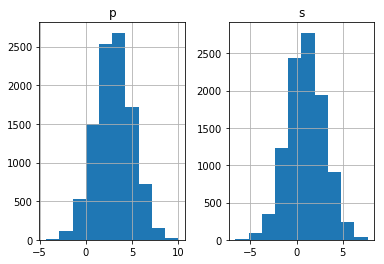

In [102]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1147d94a8>,
      dtype=object)

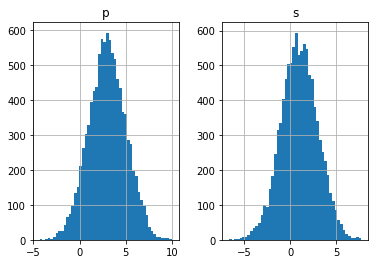

In [103]:
df.hist(bins=50)

In [108]:
s_avg=df.s.mean()
s_std=df.s.std()

p_avg=df.p.mean()
p_std=df.p.std()

print(s_avg,s_std)
print(p_avg,p_std)

0.9983523504991181 1.9818834207639877
2.999691519353042 2.003136573518766


In [110]:
z=(p_avg-s_avg)/s_std
st.norm.cdf(z)

0.8437084645439683

In [111]:
1-st.norm.cdf(z)

0.1562915354560317